In [1]:
import h2o
from h2o.estimators.glm import H2OGeneralizedLinearEstimator
from h2o.estimators.random_forest import H2ORandomForestEstimator
from h2o.estimators.gbm import H2OGradientBoostingEstimator
from h2o.estimators.stackedensemble import H2OStackedEnsembleEstimator

In [2]:
h2o.init()

Checking whether there is an H2O instance running at http://localhost:54321..... not found.
Attempting to start a local H2O server...
; Java HotSpot(TM) 64-Bit Server VM (build 25.191-b12, mixed mode)
  Starting server from C:\Users\Sachin.Manjhi\AppData\Local\Continuum\anaconda3\lib\site-packages\h2o\backend\bin\h2o.jar
  Ice root: C:\Users\SACHIN~1.MAN\AppData\Local\Temp\tmpmfrwe2x0
  JVM stdout: C:\Users\SACHIN~1.MAN\AppData\Local\Temp\tmpmfrwe2x0\h2o_sachin_manjhi_started_from_python.out
  JVM stderr: C:\Users\SACHIN~1.MAN\AppData\Local\Temp\tmpmfrwe2x0\h2o_sachin_manjhi_started_from_python.err
  Server is running at http://127.0.0.1:54321
Connecting to H2O server at http://127.0.0.1:54321... successful.


H2O cluster uptime:,08 secs
H2O cluster timezone:,Asia/Kolkata
H2O data parsing timezone:,UTC
H2O cluster version:,3.22.1.2
H2O cluster version age:,1 month
H2O cluster name:,H2O_from_python_sachin_manjhi_s89mws
H2O cluster total nodes:,1
H2O cluster free memory:,3.531 Gb
H2O cluster total cores:,4
H2O cluster allowed cores:,4
H2O cluster status:,"accepting new members, healthy"


In [3]:
# import the higgs_train_5k train and test datasets
train = h2o.import_file("https://s3.amazonaws.com/h2o-public-test-data/smalldata/testng/higgs_train_5k.csv")
test = h2o.import_file("https://s3.amazonaws.com/h2o-public-test-data/smalldata/testng/higgs_test_5k.csv")

Parse progress: |█████████████████████████████████████████████████████████| 100%
Parse progress: |█████████████████████████████████████████████████████████| 100%


In [11]:
train.head(5)

response,x1,x2,x3,x4,x5,x6,x7,x8,x9,x10,x11,x12,x13,x14,x15,x16,x17,x18,x19,x20,x21,x22,x23,x24,x25,x26,x27,x28
1,0.869293,-0.635082,0.22569,0.32747,-0.689993,0.754202,-0.248573,-1.09206,0,1.37499,-0.653674,0.930349,1.10744,1.1389,-1.5782,-1.04699,0,0.65793,-0.0104546,-0.0457672,3.10196,1.35376,0.979563,0.978076,0.920005,0.721657,0.988751,0.876678
1,0.907542,0.329147,0.359412,1.49797,-0.31301,1.09553,-0.557525,-1.58823,2.17308,0.812581,-0.213642,1.27101,2.21487,0.499994,-1.26143,0.732156,0,0.398701,-1.13893,-0.00081911,0,0.30222,0.833048,0.9857,0.978098,0.779732,0.992356,0.798343
1,0.798835,1.47064,-1.63597,0.453773,0.425629,1.10487,1.28232,1.38166,0,0.851737,1.54066,-0.81969,2.21487,0.99349,0.35608,-0.208778,2.54822,1.25695,1.12885,0.900461,0,0.909753,1.10833,0.985692,0.951331,0.803252,0.865924,0.780118
0,1.34438,-0.876626,0.935913,1.99205,0.882454,1.78607,-1.64678,-0.942383,0,2.42326,-0.676016,0.736159,2.21487,1.29872,-1.43074,-0.364658,0,0.745313,-0.678379,-1.36036,0,0.946652,1.0287,0.998656,0.728281,0.8692,1.02674,0.957904
1,1.10501,0.321356,1.5224,0.882808,-1.20535,0.681466,-1.07046,-0.921871,0,0.800872,1.02097,0.971407,2.21487,0.596761,-0.350273,0.631194,0,0.479999,-0.373566,0.113041,0,0.755856,1.36106,0.98661,0.838085,1.1333,0.872245,0.808487


In [13]:
train.shape

(5000, 29)

In [6]:
# Identify predictors and response
x = train.columns
y = "response"
x.remove(y)

# Convert the response column in train and test datasets to a factor
train[y] = train[y].asfactor()
test[y] = test[y].asfactor()

In [7]:
# Start with a simple logistic regression model (glm)
nfolds = 3

glm_model = H2OGeneralizedLinearEstimator(family= "binomial", 
                                          lambda_ = 0, 
                                          compute_p_values = True, 
                                          nfolds=nfolds,
                                          fold_assignment="Modulo",
                                          keep_cross_validation_predictions=True,)
glm_model.train(x, y,training_frame= train)

# Coefficients evaluated by the model.
print(glm_model.coef())

glm Model Build progress: |███████████████████████████████████████████████| 100%
{'Intercept': 0.5892538307810715, 'x1': -0.3363018934827509, 'x2': -0.02275957038234858, 'x3': 0.0013156496345038595, 'x4': -0.3323462005482038, 'x5': -0.005231179329252297, 'x6': 0.6898784661033115, 'x7': -0.01354680173601027, 'x8': -0.021344953872750143, 'x9': 0.0461025672930758, 'x10': 0.21211488288632127, 'x11': 0.11241749759069462, 'x12': -0.01246973901158352, 'x13': -0.05984504329692051, 'x14': 0.2570982850137648, 'x15': -0.0032925358004623393, 'x16': -0.024663181794075374, 'x17': -0.04359199307184659, 'x18': 0.11561227254788886, 'x19': 0.026279391596324406, 'x20': -0.009270195025769364, 'x21': -0.047679598789301225, 'x22': -0.14902183320073728, 'x23': 0.4889509916016148, 'x24': 0.610850937894846, 'x25': 0.38061762124943666, 'x26': -1.2829702491816084, 'x27': 1.8352601577482122, 'x28': -3.1001341772741124}


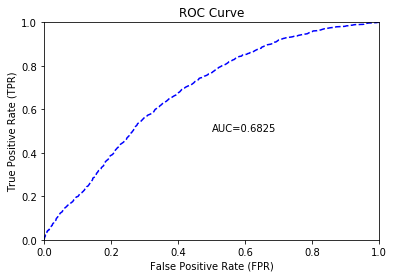

In [10]:
# ROC curve for the glm model
glm_model.model_performance(test).plot()

### Train the base learners 

In [9]:
# Set number of folds for base learners
nfolds = 3

# Train and cross-validate a GBM model
my_gbm = H2OGradientBoostingEstimator(distribution="bernoulli",
                                      ntrees=20,
                                      nfolds=nfolds,
                                      fold_assignment="Modulo",
                                      keep_cross_validation_predictions=True,
                                      seed=1)
my_gbm.train(x=x, y=y, training_frame=train)

# Train and cross-validate an RF model
my_rf = H2ORandomForestEstimator(ntrees=50,
                                 nfolds=nfolds,
                                 fold_assignment="Modulo",
                                 keep_cross_validation_predictions=True,
                                 seed=1)
my_rf.train(x=x, y=y, training_frame=train)

gbm Model Build progress: |███████████████████████████████████████████████| 100%
drf Model Build progress: |███████████████████████████████████████████████| 100%


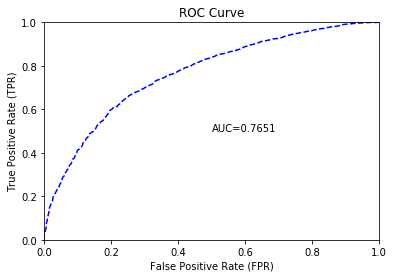

In [23]:
my_gbm.model_performance(test).plot()

### Next we can train a few different ensembles using different metalearners

In [12]:
# Train a stacked ensemble using the default metalearner algorithm
stack = H2OStackedEnsembleEstimator(base_models=[my_gbm, my_rf, glm_model])
stack.train(x=x, y=y, training_frame=train)
stack.model_performance(test).auc()                       # 0.7522591310013634


stackedensemble Model Build progress: |███████████████████████████████████| 100%


0.7736328132855517

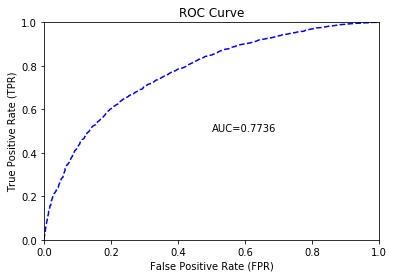

In [27]:
stack.model_performance(test).plot()

stackedensemble Model Build progress: |███████████████████████████████████| 100%


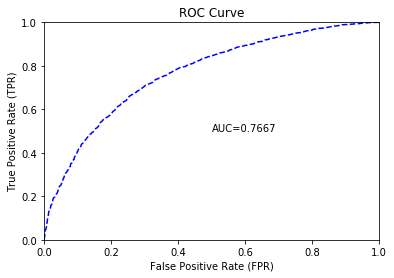

In [28]:
# Train a stacked ensemble with a GBM metalearner algorithm
# The metelearner will use GBM default values
stack_gbm = H2OStackedEnsembleEstimator(base_models=[my_gbm, my_rf, glm_model],
                                        metalearner_algorithm="gbm")
stack_gbm.train(x=x, y=y, training_frame=train)
#stack_gbm.model_performance(test).auc()                             # 0.7522591310013634
stack_gbm.model_performance(test).plot()                             

stackedensemble Model Build progress: |███████████████████████████████████| 100%


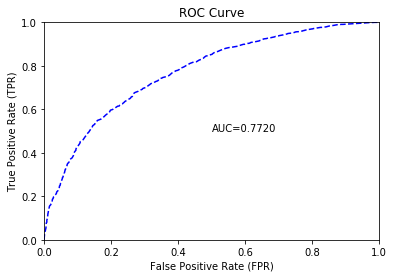

In [29]:
# Train a stacked ensemble with a Deep Learning metalearner algorithm
# The metelearner will use Deep Learning default values
stack_dl = H2OStackedEnsembleEstimator(base_models=[my_gbm, my_rf, glm_model],
                                       metalearner_algorithm="deeplearning")
stack_dl.train(x=x, y=y, training_frame=train)
#stack_dl.model_performance(test).auc()                              # 0.7634122856763638
stack_dl.model_performance(test).plot()                            

In [17]:
h2o.cluster().shutdown()

H2O session _sid_abce closed.
